In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import re
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors

In [61]:
df = pd.read_csv('for_EDA_fixed.csv', encoding='utf-8')
df

,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics,Graphics_Series,Storage_Clean
0,Baldur's Gate 3,29.99,29.99,0.00,2023.0,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,128900.0,96.0,Larian Studios,Larian Studios,"[English, French, German, Spanish - Spain, Pol...","[RPG, Choices Matter, Character Customization,...","[Single-player, Online Co-op, LAN Co-op, Steam...",Intel i5,8.0,Nvidia GTX 970 / RX 480 (4GB+ of VRAM),gtx 970,150GB
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012.0,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,75284.0,89.0,"Valve, Hidden Path Entertainment",Valve,"[English, Czech, Danish, Dutch, Finnish, Frenc...","[FPS, Shooter, Multiplayer, Competitive, Actio...","[Steam Achievements, Full controller support, ...",Intel Core2 Duo,2.0,Video card must be 256 MB or more and should b...,256 mb,15GB
2,Apex Legends™,0.00,0.00,0.00,2020.0,"Apex Legends is the award-winning, free-to-pla...",Mixed,18581.0,65.0,Respawn Entertainment,Electronic Arts,"[English, French, Italian, German, Spanish - S...","[Free to Play, Multiplayer, Battle Royale, Sho...","[Online PvP, Online Co-op, Steam Achievements,...",AMD FX,6.0,"AMD Radeon™ HD 7730, NVIDIA GeForce® GT 640",gt 640,56GB
3,Forza Horizon 5,34.78,17.39,17.39,2021.0,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,4120.0,87.0,Playground Games,Xbox Game Studios,"[English, French, Italian, German, Spanish - S...","[Racing, Open World, Driving, Multiplayer, Aut...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,NVidia GTX 970 OR AMD RX 470,gtx 970,110GB
4,Call of Duty®,0.00,0.00,0.00,2022.0,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,8257.0,49.0,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"[English, French, Italian, German, Spanish - S...","[FPS, Multiplayer, Shooter, Action, Singleplay...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,NVIDIA® GeForce® GTX 960 or AMD Radeon™ RX 470...,gtx 960,125GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71694,The Front,0.00,0.00,0.00,NaN,The Front is a survival-open-world-crafting (S...,NaN,NaN,NaN,Samar Studio,Samar Studio,"[English, French, German, Russian, Japanese, S...","[Early Access, Survival, Building, Sandbox, Po...","[Single-player, MMO, Online PvP, LAN PvP, Onli...",Intel i5,16.0,Nvidia GTX 1060 6GB,gtx 1060,40GB
71695,The Bornless,0.00,0.00,0.00,NaN,"Welcome to The Bornless, an action horror FPS....",NaN,NaN,NaN,Cathedral Studios,Cathedral Studios,"[English, French, Italian, German, Spanish - S...","[Early Access, Horror, FPS, Shooter, Multiplay...","[Single-player, Online PvP, Online Co-op, Part...",Ryzen,8.0,Nvidia 960,nvidia 960,30GB
71696,Winter Memories,0.00,0.00,0.00,NaN,After the unforgettable summer memories you’ve...,NaN,NaN,NaN,Dojin Otome,Kagura Games,"[English, Japanese, Simplified Chinese]","[Casual, RPG, Simulation, Sexual Content, Hent...",[Single-player],Intel Core2 Duo,4.0,DirectX 9/OpenGL 4.1 capable GPU,API directx 9,4GB
71697,Call of Duty®: Modern Warfare® III,69.99,69.99,0.00,NaN,In the direct sequel to the record-breaking Ca...,NaN,NaN,NaN,"Sledgehammer Games, Treyarch, Infinity Ward, B...",Activision,"[English, French, Italian, German, Spanish - S...","[Action, FPS, Shooter, First-Person, Military,...","[Single-player, Online PvP, Online Co-op, Cros...",NaN,NaN,NaN,NaN,NaN


In [62]:
correlation_matrix = df.corr(numeric_only = True)
correlation_matrix

,Original Price,Discounted Price,Price Difference,Release Date,Reviews_number,Reviews_percentage,Memory
Original Price,1.000000,0.999953,0.999991,-0.001012,0.009123,-0.022843,-0.000022
Discounted Price,0.999953,1.000000,0.999905,-0.000969,0.025858,0.016513,-0.000023
Price Difference,0.999991,0.999905,1.000000,-0.001031,-0.002969,-0.034401,-0.000022
Release Date,-0.001012,-0.000969,-0.001031,1.000000,-0.052814,0.158993,0.005406
Reviews_number,0.009123,0.025858,-0.002969,-0.052814,1.000000,0.012302,-0.000426
Reviews_percentage,-0.022843,0.016513,-0.034401,0.158993,0.012302,1.000000,0.006348
Memory,-0.000022,-0.000023,-0.000022,0.005406,-0.000426,0.006348,1.000000


In [63]:
df.describe()

,Original Price,Discounted Price,Price Difference,Release Date,Reviews_number,Reviews_percentage,Memory
count,7.169900e+04,7.169900e+04,7.169900e+04,61492.000000,37481.000000,37481.000000,6.554300e+04
mean,5.943900e+02,1.821678e+02,4.122223e+02,2019.433813,201.664603,76.729436,1.489957e+11
std,9.085828e+04,2.725981e+04,6.360028e+04,2.919596,1771.148316,18.005781,3.814494e+13
min,0.000000e+00,0.000000e+00,0.000000e+00,1969.000000,10.000000,0.000000,0.000000e+00
25%,7.900000e-01,3.400000e-01,0.000000e+00,2018.000000,19.000000,67.000000,1.000000e+00
50%,2.790000e+00,2.690000e+00,0.000000e+00,2020.000000,42.000000,81.000000,2.000000e+00
75%,6.290000e+00,6.290000e+00,0.000000e+00,2022.000000,133.000000,90.000000,4.000000e+00
max,1.404633e+07,4.213900e+06,9.832433e+06,2023.000000,154266.000000,100.000000,9.765625e+15


In [64]:
numeric_columns = df.select_dtypes(include=np.number)

has_inf = np.isinf(numeric_columns).any().any()

if has_inf:
    print("DataFrame contains infinite values.")
else:
    print("DataFrame does not contain infinite values.")

DataFrame does not contain infinite values.


In [65]:
df.isnull().sum()

Title                      1
Original Price             0
Discounted Price           0
Price Difference           0
Release Date           10207
Game Description         210
Reviews Summary        34218
Reviews_number         34218
Reviews_percentage     34218
Developer                220
Publisher                516
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               6326
Memory                  6156
Graphics               11037
Graphics_Series        20863
Storage_Clean           7636
dtype: int64

In [66]:
print(df[df['Title'].isna()]['Game Description'])
df[df['Title'].isna()]

40251    Darkness. Nothing. There’s no memory of what h...
Name: Game Description, dtype: object


,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics,Graphics_Series,Storage_Clean
40251,NaN,0.9,0.9,0.0,2022.0,Darkness. Nothing. There’s no memory of what h...,NaN,NaN,NaN,WolfePack,WolfePack,[English],"[Horror, Adventure, Atmospheric, Exploration, ...","[Single-player, Steam Achievements, Steam Cloud]",Intel Core 2 Duo 2.3 GHz or better,0.5,Intel Integrated HD Graphics 2000,integrated 2000,300MB


In [67]:
df.loc[40251, 'Title'] = 'Unknown'
df.loc[40251]

Title                                                            Unknown
Original Price                                                       0.9
Discounted Price                                                     0.9
Price Difference                                                     0.0
Release Date                                                      2022.0
Game Description       Darkness. Nothing. There’s no memory of what h...
Reviews Summary                                                      NaN
Reviews_number                                                       NaN
Reviews_percentage                                                   NaN
Developer                                                      WolfePack
Publisher                                                      WolfePack
Supported Languages                                            [English]
Popular Tags           [Horror, Adventure, Atmospheric, Exploration, ...
Game Features           [Single-player, Steam Achie

In [68]:
#Cleaning the Release Date column. Only marked as NaN if the game has not been released yet.

df['Is_Upcoming'] = df['Release Date'].isnull().astype(int)

df.loc[df['Is_Upcoming'] == 1, 'Reviews Summary'] = 'Unknown'
df.loc[df['Is_Upcoming'] == 1, ['Reviews_number', 'Reviews_percentage']] = 0

requirements_columns = ['Processor', 'Memory', 'Graphics_Series', 'Storage_Clean']
for column in requirements_columns:
    df.loc[df['Is_Upcoming'] == 1, column] = 'Unknown'

In [69]:
df

,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics,Graphics_Series,Storage_Clean,Is_Upcoming
0,Baldur's Gate 3,29.99,29.99,0.00,2023.0,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,128900.0,96.0,Larian Studios,Larian Studios,"[English, French, German, Spanish - Spain, Pol...","[RPG, Choices Matter, Character Customization,...","[Single-player, Online Co-op, LAN Co-op, Steam...",Intel i5,8.0,Nvidia GTX 970 / RX 480 (4GB+ of VRAM),gtx 970,150GB,0
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012.0,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,75284.0,89.0,"Valve, Hidden Path Entertainment",Valve,"[English, Czech, Danish, Dutch, Finnish, Frenc...","[FPS, Shooter, Multiplayer, Competitive, Actio...","[Steam Achievements, Full controller support, ...",Intel Core2 Duo,2.0,Video card must be 256 MB or more and should b...,256 mb,15GB,0
2,Apex Legends™,0.00,0.00,0.00,2020.0,"Apex Legends is the award-winning, free-to-pla...",Mixed,18581.0,65.0,Respawn Entertainment,Electronic Arts,"[English, French, Italian, German, Spanish - S...","[Free to Play, Multiplayer, Battle Royale, Sho...","[Online PvP, Online Co-op, Steam Achievements,...",AMD FX,6.0,"AMD Radeon™ HD 7730, NVIDIA GeForce® GT 640",gt 640,56GB,0
3,Forza Horizon 5,34.78,17.39,17.39,2021.0,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,4120.0,87.0,Playground Games,Xbox Game Studios,"[English, French, Italian, German, Spanish - S...","[Racing, Open World, Driving, Multiplayer, Aut...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,NVidia GTX 970 OR AMD RX 470,gtx 970,110GB,0
4,Call of Duty®,0.00,0.00,0.00,2022.0,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,8257.0,49.0,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"[English, French, Italian, German, Spanish - S...","[FPS, Multiplayer, Shooter, Action, Singleplay...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,NVIDIA® GeForce® GTX 960 or AMD Radeon™ RX 470...,gtx 960,125GB,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71694,The Front,0.00,0.00,0.00,NaN,The Front is a survival-open-world-crafting (S...,Unknown,0.0,0.0,Samar Studio,Samar Studio,"[English, French, German, Russian, Japanese, S...","[Early Access, Survival, Building, Sandbox, Po...","[Single-player, MMO, Online PvP, LAN PvP, Onli...",Unknown,Unknown,Nvidia GTX 1060 6GB,Unknown,Unknown,1
71695,The Bornless,0.00,0.00,0.00,NaN,"Welcome to The Bornless, an action horror FPS....",Unknown,0.0,0.0,Cathedral Studios,Cathedral Studios,"[English, French, Italian, German, Spanish - S...","[Early Access, Horror, FPS, Shooter, Multiplay...","[Single-player, Online PvP, Online Co-op, Part...",Unknown,Unknown,Nvidia 960,Unknown,Unknown,1
71696,Winter Memories,0.00,0.00,0.00,NaN,After the unforgettable summer memories you’ve...,Unknown,0.0,0.0,Dojin Otome,Kagura Games,"[English, Japanese, Simplified Chinese]","[Casual, RPG, Simulation, Sexual Content, Hent...",[Single-player],Unknown,Unknown,DirectX 9/OpenGL 4.1 capable GPU,Unknown,Unknown,1
71697,Call of Duty®: Modern Warfare® III,69.99,69.99,0.00,NaN,In the direct sequel to the record-breaking Ca...,Unknown,0.0,0.0,"Sledgehammer Games, Treyarch, Infinity Ward, B...",Activision,"[English, French, Italian, German, Spanish - S...","[Action, FPS, Shooter, First-Person, Military,...","[Single-player, Online PvP, Online Co-op, Cros...",Unknown,Unknown,NaN,Unknown,Unknown,1


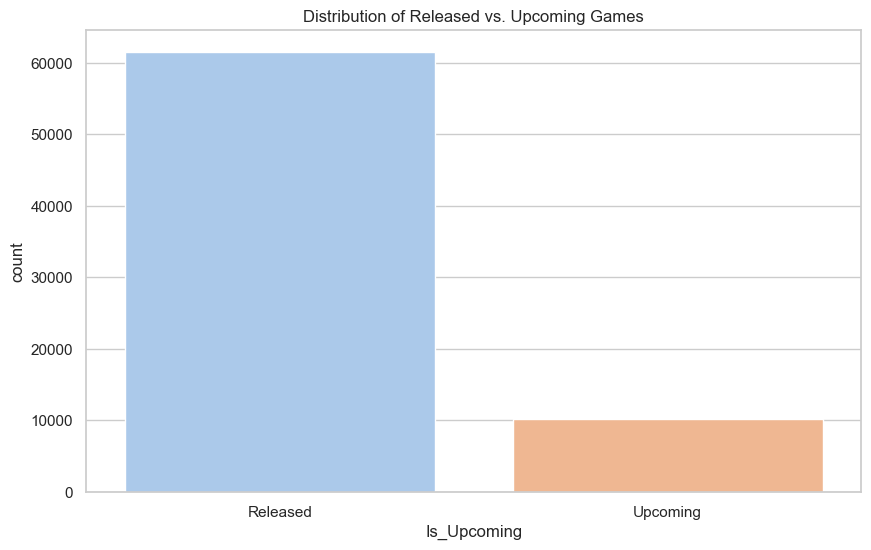

In [70]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10,6))
plot = sns.countplot(data=df, x='Is_Upcoming', palette='pastel')
plt.title('Distribution of Released vs. Upcoming Games')
plt.xticks(ticks=[0,1], labels=['Released', 'Upcoming'])

mplcursors.cursor(hover=True)

plt.show()

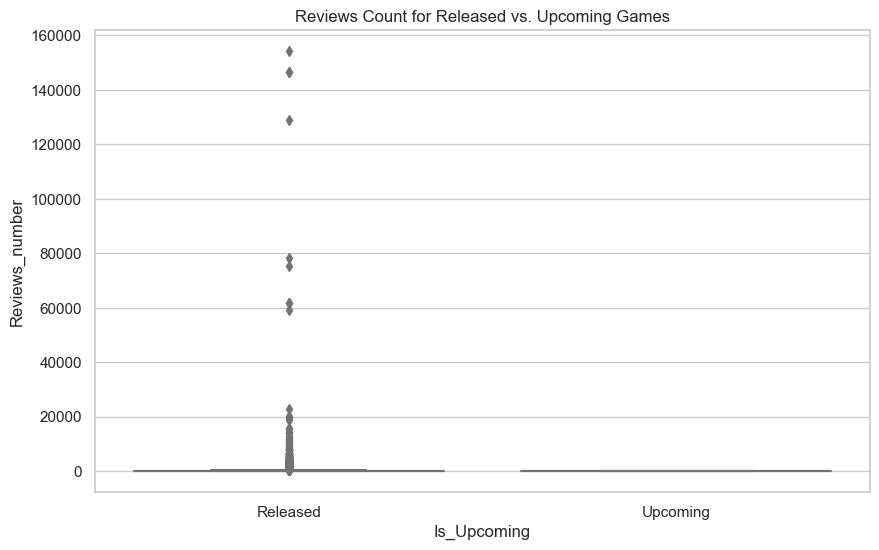

In [71]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Is_Upcoming', y='Reviews_number', palette='pastel')
plt.title('Reviews Count for Released vs. Upcoming Games')
plt.xticks(ticks=[0,1], labels=['Released', 'Upcoming'])
plt.show()

In [72]:
#Steam pre-uploads game on platfrom about a year before it is released, so we can roughly assume the game will 
#be released in 2024 if the label is upcoming.

df['Release Date'].fillna(2024, inplace=True)
df.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description         210
Reviews Summary        24084
Reviews_number         24084
Reviews_percentage     24084
Developer                220
Publisher                516
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4963
Memory                  4599
Graphics               11037
Graphics_Series        17983
Storage_Clean           5614
Is_Upcoming                0
dtype: int64

In [73]:
#Adding game description  text feature since it implies the detailing of the game

df['description_length'] = df['Game Description'].fillna('').apply(len)

In [74]:
df['Game Description'].fillna('Unknown', inplace=True)

In [75]:
df.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary        24084
Reviews_number         24084
Reviews_percentage     24084
Developer                220
Publisher                516
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4963
Memory                  4599
Graphics               11037
Graphics_Series        17983
Storage_Clean           5614
Is_Upcoming                0
description_length         0
dtype: int64

In [76]:
#We can see that Reviews related columns also lost NaN values which we handled while we labeled them 'Unknown' 
#when we worked on Release Date column

reviews_nan_data = df[df['Reviews Summary'].isna()]
print(reviews_nan_data['Release Date'].unique())
reviews_nan_data

[2016. 2021. 2022. 2015. 2000. 2007. 2023. 2020. 2017. 2012. 2018. 2009.
 2014. 2019. 2006. 2010. 2013. 2008. 2011. 1969.]


,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,...,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics,Graphics_Series,Storage_Clean,Is_Upcoming,description_length
1317,The Witcher 3: Wild Hunt - Complete Edition,24.99,24.99,0.0,2016.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Downloadable Content, Steam Ac...",NaN,NaN,NaN,NaN,NaN,0,0
1448,The Elder Scrolls V: Skyrim Anniversary Edition,30.99,30.99,0.0,2021.0,Unknown,NaN,NaN,NaN,NaN,...,[],[Violent],[],NaN,NaN,NaN,NaN,NaN,0,0
1583,DARK SOULS III Deluxe Edition,64.98,64.98,0.0,2016.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Downloadable Content, Steam Ac...",NaN,NaN,NaN,NaN,NaN,0,0
1665,Monster Hunter Rise + Sunbreak,47.99,47.99,0.0,2022.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Online Co-op, Downloadable Con...",NaN,NaN,NaN,NaN,NaN,0,0
2057,Fallout 4: Game of the Year Edition,29.99,29.99,0.0,2015.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],[],NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71666,Fluxion,14.49,14.49,0.0,2023.0,Fluxion is a thrilling 3D action platformer wh...,NaN,NaN,NaN,Mystic Panda Games,...,[English],"[Casual, Racing, 3D Fighter, 3D Platformer, 3D...",[Single-player],i5,8.0,1050,NaN,100MB,0,154
71669,Respawn,1.99,1.99,0.0,2023.0,"""Respawn"" is an independent adventure game in ...",NaN,NaN,NaN,夕末游戏,...,"[English, Simplified Chinese]","[Adventure, Action-Adventure, Action RPG, 2D P...",[Single-player],| Memory:,4.0,DirectX:,NaN,1GB,0,293
71672,Cruo Domine,0.00,0.00,0.0,2023.0,Survive in a hostile space environment with ra...,NaN,NaN,NaN,Jiri Otoupal,...,[English],"[Early Access, Action, Adventure, RPG, Sandbox...","[Single-player, Steam Achievements, Tracked Co...",Intel i5,8.0,Nvidia GeForce GTX 1060 / AMD Radeon RX 400 Se...,gtx 1060,2GB,0,198
71679,Survival & Horror: Undead Space,0.00,0.00,0.0,2023.0,"The events take place in the future, on resear...",NaN,NaN,NaN,PunkOFF,...,"[English, Russian]","[Action, Adventure, Space, Shooter, Exploratio...","[Single-player, Steam Achievements, Full contr...",Intel i5,6.0,NVIDIA® GeForce® GTX 760 or AMD Radeon™ R7 260...,gtx 760,30GB,0,269


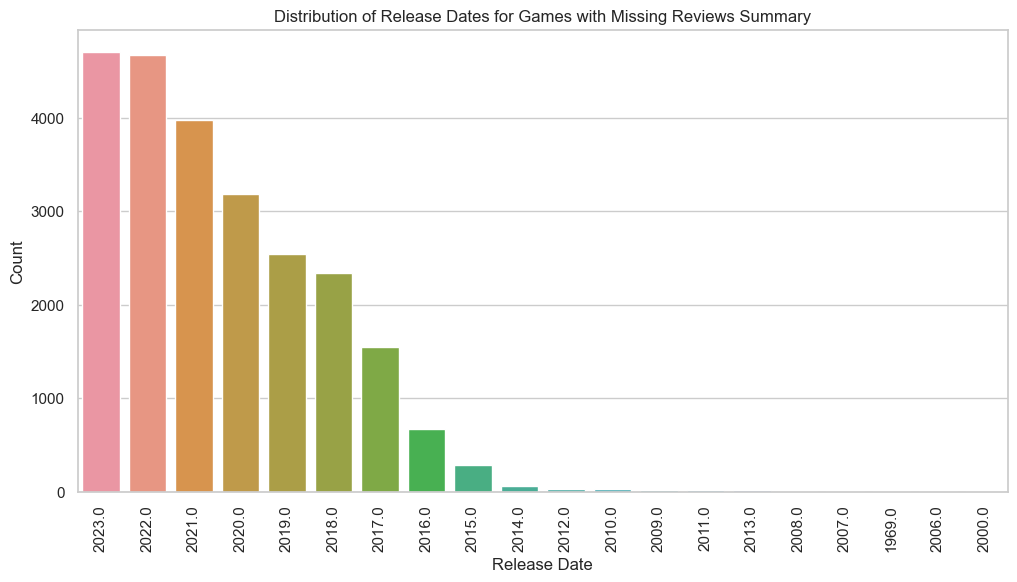

In [77]:
plt.figure(figsize=(12, 6))
sns.countplot(data=reviews_nan_data, x='Release Date', order=reviews_nan_data['Release Date'].value_counts().index)
plt.title('Distribution of Release Dates for Games with Missing Reviews Summary')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [78]:
#So many games were released in 2022 and 2023 that have little to no reviews, thus team foes not provide any info about the
#input in there, so we cannot determine their values. Notice that a lot of games with the word "edition" in their title also have
#A lot of NaN values, this is due to them being extensions of their original title and do not have any information about them
#Lets get rid of the extensions

df = df[~df['Title'].str.endswith('Edition')]

df.reset_index(drop=True, inplace=True)

In [79]:
df.shape

(70465, 21)

In [80]:
df.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary        23572
Reviews_number         23572
Reviews_percentage     23572
Developer                169
Publisher                484
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4843
Memory                  4468
Graphics               10397
Graphics_Series        17256
Storage_Clean           5448
Is_Upcoming                0
description_length         0
dtype: int64

In [81]:
reviews_nan_data = df[df['Reviews Summary'].isna()]
reviews_nan_data

,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,...,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics,Graphics_Series,Storage_Clean,Is_Upcoming,description_length
1582,Monster Hunter Rise + Sunbreak,47.99,47.99,0.0,2022.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Online Co-op, Downloadable Con...",NaN,NaN,NaN,NaN,NaN,0,0
2257,Ricochet,3.29,3.29,0.0,2000.0,Battle your friends in exciting arenas with yo...,NaN,NaN,NaN,"Nathaniel Stauffer, Michael Stauffer",...,[English],"[Action, Multiplayer, Local Multiplayer, 2D, 2...","[Shared/Split Screen PvP, Full controller supp...","x86, x64 architecture with SSE2 instruction se...",NaN,"DX10, DX11, DX12 capable",API dx10,450MB,0,264
2581,ROMANCE OF THE THREE KINGDOMS XIV: Diplomacy a...,69.99,69.99,0.0,2020.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Downloadable Content, Steam Ac...",NaN,NaN,NaN,NaN,NaN,0,0
2647,Mega Man Battle Network Legacy Collection (Vol...,47.99,47.99,0.0,2023.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Online PvP, Steam Achievements...",NaN,NaN,NaN,NaN,NaN,0,0
3077,Romance of the Three Kingdoms XIII Fame and St...,34.99,34.99,0.0,2017.0,Unknown,NaN,NaN,NaN,NaN,...,[],[],"[Single-player, Downloadable Content, Steam Cl...",NaN,NaN,NaN,NaN,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70433,Fluxion,14.49,14.49,0.0,2023.0,Fluxion is a thrilling 3D action platformer wh...,NaN,NaN,NaN,Mystic Panda Games,...,[English],"[Casual, Racing, 3D Fighter, 3D Platformer, 3D...",[Single-player],i5,8.0,1050,NaN,100MB,0,154
70436,Respawn,1.99,1.99,0.0,2023.0,"""Respawn"" is an independent adventure game in ...",NaN,NaN,NaN,夕末游戏,...,"[English, Simplified Chinese]","[Adventure, Action-Adventure, Action RPG, 2D P...",[Single-player],| Memory:,4.0,DirectX:,NaN,1GB,0,293
70439,Cruo Domine,0.00,0.00,0.0,2023.0,Survive in a hostile space environment with ra...,NaN,NaN,NaN,Jiri Otoupal,...,[English],"[Early Access, Action, Adventure, RPG, Sandbox...","[Single-player, Steam Achievements, Tracked Co...",Intel i5,8.0,Nvidia GeForce GTX 1060 / AMD Radeon RX 400 Se...,gtx 1060,2GB,0,198
70446,Survival & Horror: Undead Space,0.00,0.00,0.0,2023.0,"The events take place in the future, on resear...",NaN,NaN,NaN,PunkOFF,...,"[English, Russian]","[Action, Adventure, Space, Shooter, Exploratio...","[Single-player, Steam Achievements, Full contr...",Intel i5,6.0,NVIDIA® GeForce® GTX 760 or AMD Radeon™ R7 260...,gtx 760,30GB,0,269


In [82]:
#Some of these values are going to be uninformative for the model.

unknown_mask = (df.drop(columns=['Title']) == 'Unknown')
nan_mask = df.drop(columns=['Title']).isnull()

total_mask = unknown_mask | nan_mask
unknown_or_nan_counts = total_mask.sum(axis=1)

df = df[unknown_or_nan_counts < 10]

df.reset_index(drop=True, inplace=True)

In [83]:
df.shape

(70374, 21)

In [84]:
df.isnull().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary        23481
Reviews_number         23481
Reviews_percentage     23481
Developer                 78
Publisher                424
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4752
Memory                  4377
Graphics               10306
Graphics_Series        17165
Storage_Clean           5357
Is_Upcoming                0
description_length         0
dtype: int64

In [85]:
reviews_nan_data = df[df['Reviews Summary'].isna()]
reviews_nan_data

,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,...,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics,Graphics_Series,Storage_Clean,Is_Upcoming,description_length
2256,Ricochet,3.29,3.29,0.00,2000.0,Battle your friends in exciting arenas with yo...,NaN,NaN,NaN,"Nathaniel Stauffer, Michael Stauffer",...,[English],"[Action, Multiplayer, Local Multiplayer, 2D, 2...","[Shared/Split Screen PvP, Full controller supp...","x86, x64 architecture with SSE2 instruction se...",NaN,"DX10, DX11, DX12 capable",API dx10,450MB,0,264
16436,Golden Hornet,0.90,0.90,0.00,2017.0,Golden Hornet is a retro style twin-stick shoo...,NaN,NaN,NaN,Hijong Park,...,"[English, Korean]","[Free to Play, Action, Indie, Retro, 2D, Shoot...","[Single-player, Full controller support]",Intel Pentium 4 Series,1.0,CPU-integrated or on-board graphics,NaN,20MB,0,158
17255,Chicken Bomb,0.90,0.90,0.00,2020.0,It’s not justa a bomb game. It’s a CHICKEN BOM...,NaN,NaN,NaN,GoesSoft,...,"[English, French, Italian, German, Spanish - S...","[RPG, Action, Adventure, Singleplayer, Arcade,...","[Single-player, Steam Achievements, Partial Co...",Intel Core2 Quad Q8200 (4 * 2330) / AMD Athlon...,4.0,GeForce 240 GT or Radeon HD 6570 – 1024 MB (1 ...,gt 6570,1GB,0,93
17996,BEAST CRIMES,2.69,2.69,0.00,2022.0,A beastly crime investigation drama.,NaN,NaN,NaN,"Link Häggman, My Häggman",...,[English],"[Choose Your Own Adventure, Visual Novel, Inte...","[Single-player, Steam Achievements, Full contr...",Intel Core i3,8.0,NaN,NaN,2GB,0,36
19793,Entomophobia,2.19,1.46,0.73,2022.0,A top-down Roguelite Bullethell where you kill...,NaN,NaN,NaN,VuVuu,...,[English],"[Action Roguelike, Bullet Hell, Roguelite, Act...","[Single-player, Steam Achievements, Stats]",2.0 Ghz,1.0,1GB Video Memory,1gb,100MB,0,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70342,Fluxion,14.49,14.49,0.00,2023.0,Fluxion is a thrilling 3D action platformer wh...,NaN,NaN,NaN,Mystic Panda Games,...,[English],"[Casual, Racing, 3D Fighter, 3D Platformer, 3D...",[Single-player],i5,8.0,1050,NaN,100MB,0,154
70345,Respawn,1.99,1.99,0.00,2023.0,"""Respawn"" is an independent adventure game in ...",NaN,NaN,NaN,夕末游戏,...,"[English, Simplified Chinese]","[Adventure, Action-Adventure, Action RPG, 2D P...",[Single-player],| Memory:,4.0,DirectX:,NaN,1GB,0,293
70348,Cruo Domine,0.00,0.00,0.00,2023.0,Survive in a hostile space environment with ra...,NaN,NaN,NaN,Jiri Otoupal,...,[English],"[Early Access, Action, Adventure, RPG, Sandbox...","[Single-player, Steam Achievements, Tracked Co...",Intel i5,8.0,Nvidia GeForce GTX 1060 / AMD Radeon RX 400 Se...,gtx 1060,2GB,0,198
70355,Survival & Horror: Undead Space,0.00,0.00,0.00,2023.0,"The events take place in the future, on resear...",NaN,NaN,NaN,PunkOFF,...,"[English, Russian]","[Action, Adventure, Space, Shooter, Exploratio...","[Single-player, Steam Achievements, Full contr...",Intel i5,6.0,NVIDIA® GeForce® GTX 760 or AMD Radeon™ R7 260...,gtx 760,30GB,0,269


In [86]:
#other games are not so much well-known and thus have close to no reviews. 
#So we can call these cases unknown in summary and 0 in numbers and percentages columns

In [87]:
df['Reviews Summary'].fillna('Unknown', inplace=True)
df['Reviews_number'].fillna(0, inplace=True)
df['Reviews_percentage'].fillna(0, inplace=True)
df.isna().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary            0
Reviews_number             0
Reviews_percentage         0
Developer                 78
Publisher                424
Supported Languages        0
Popular Tags               0
Game Features              0
Processor               4752
Memory                  4377
Graphics               10306
Graphics_Series        17165
Storage_Clean           5357
Is_Upcoming                0
description_length         0
dtype: int64

In [88]:
cols_textual = ['Developer', 'Publisher', 'Supported Languages', 'Popular Tags', 'Game Features']
for col in cols_textual:
    df[col].fillna('Unknown', inplace=True)

cols_hardware = ['Processor', 'Graphics_Series']
for col in cols_hardware:
    df[col].fillna('Unknown', inplace=True)   
df.isna().sum()

Title                      0
Original Price             0
Discounted Price           0
Price Difference           0
Release Date               0
Game Description           0
Reviews Summary            0
Reviews_number             0
Reviews_percentage         0
Developer                  0
Publisher                  0
Supported Languages        0
Popular Tags               0
Game Features              0
Processor                  0
Memory                  4377
Graphics               10306
Graphics_Series            0
Storage_Clean           5357
Is_Upcoming                0
description_length         0
dtype: int64

In [89]:
df = df.drop(columns=['Graphics'])
df.isna().sum()

Title                     0
Original Price            0
Discounted Price          0
Price Difference          0
Release Date              0
Game Description          0
Reviews Summary           0
Reviews_number            0
Reviews_percentage        0
Developer                 0
Publisher                 0
Supported Languages       0
Popular Tags              0
Game Features             0
Processor                 0
Memory                 4377
Graphics_Series           0
Storage_Clean          5357
Is_Upcoming               0
description_length        0
dtype: int64

In [91]:
#Cast storage values

def convert_to_gb(value):

    if not isinstance(value, str):
        return value
    
    if 'GB' in value:
        return float(value.replace('GB', '').strip())
    elif 'MB' in value:
        return float(value.replace('MB', '').strip()) / 1000
    elif value == 'Unknown':
        return None
    else:
        return value

df['Storage_Clean'] = df['Storage_Clean'].apply(convert_to_gb)

In [ ]:
#Impute Missing Values Based on Similar Rows

#Define a function impute_based_on_columns that imputes missing values in a target column based on the values in two other 
#specified columns. It identifies rows with missing values, finds similar rows based on the specified columns, 
#and fills missing values with the most frequent value from those similar rows.

In [96]:
from sklearn.ensemble import RandomForestClassifier

def impute_based_on_columns(df, target_col, based_on_cols):
    for index, row in df[df[target_col].isnull()].iterrows():
        
        similar_rows = df[(df[based_on_cols[0]] == row[based_on_cols[0]]) & 
                            (df[based_on_cols[1]] == row[based_on_cols[1]])]
        
        most_frequent_value = similar_rows[target_col].mode()
        
        if not most_frequent_value.empty:  
            df.at[index, target_col] = most_frequent_value.iloc[0]
            
    return df


df = impute_based_on_columns(df, 'Memory', ['Graphics_Series', 'Processor'])
df = impute_based_on_columns(df, 'Storage_Clean', ['Graphics_Series', 'Processor'])

In [97]:
df.isnull().sum()

Title                     0
Original Price            0
Discounted Price          0
Price Difference          0
Release Date              0
Game Description          0
Reviews Summary           0
Reviews_number            0
Reviews_percentage        0
Developer                 0
Publisher                 0
Supported Languages       0
Popular Tags              0
Game Features             0
Processor                 0
Memory                  535
Graphics_Series           0
Storage_Clean          1055
Is_Upcoming               0
description_length        0
dtype: int64

In [98]:
df['Memory'].fillna(df['Memory'].mode().iloc[0], inplace=True)
df['Storage_Clean'].fillna(df['Storage_Clean'].mode().iloc[0], inplace=True)
df

,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics_Series,Storage_Clean,Is_Upcoming,description_length
0,Baldur's Gate 3,29.99,29.99,0.00,2023.0,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,128900.0,96.0,Larian Studios,Larian Studios,"[English, French, German, Spanish - Spain, Pol...","[RPG, Choices Matter, Character Customization,...","[Single-player, Online Co-op, LAN Co-op, Steam...",Intel i5,8.0,gtx 970,150.0,0,207
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012.0,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,75284.0,89.0,"Valve, Hidden Path Entertainment",Valve,"[English, Czech, Danish, Dutch, Finnish, Frenc...","[FPS, Shooter, Multiplayer, Competitive, Actio...","[Steam Achievements, Full controller support, ...",Intel Core2 Duo,2.0,256 mb,15.0,0,275
2,Apex Legends™,0.00,0.00,0.00,2020.0,"Apex Legends is the award-winning, free-to-pla...",Mixed,18581.0,65.0,Respawn Entertainment,Electronic Arts,"[English, French, Italian, German, Spanish - S...","[Free to Play, Multiplayer, Battle Royale, Sho...","[Online PvP, Online Co-op, Steam Achievements,...",AMD FX,6.0,gt 640,56.0,0,284
3,Forza Horizon 5,34.78,17.39,17.39,2021.0,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,4120.0,87.0,Playground Games,Xbox Game Studios,"[English, French, Italian, German, Spanish - S...","[Racing, Open World, Driving, Multiplayer, Aut...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,gtx 970,110.0,0,288
4,Call of Duty®,0.00,0.00,0.00,2022.0,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,8257.0,49.0,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"[English, French, Italian, German, Spanish - S...","[FPS, Multiplayer, Shooter, Action, Singleplay...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,gtx 960,125.0,0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70369,Sunkenland,0.00,0.00,0.00,2024.0,Get ready for a Waterworld-themed survival gam...,Unknown,0.0,0.0,Vector3 Studio,Vector3 Studio,"[English, Simplified Chinese, French, German, ...","[Early Access, Open World Survival Craft, Unde...","[Single-player, Online Co-op, LAN Co-op, Steam...",Unknown,Unknown,Unknown,1.0,1,211
70370,The Front,0.00,0.00,0.00,2024.0,The Front is a survival-open-world-crafting (S...,Unknown,0.0,0.0,Samar Studio,Samar Studio,"[English, French, German, Russian, Japanese, S...","[Early Access, Survival, Building, Sandbox, Po...","[Single-player, MMO, Online PvP, LAN PvP, Onli...",Unknown,Unknown,Unknown,1.0,1,245
70371,The Bornless,0.00,0.00,0.00,2024.0,"Welcome to The Bornless, an action horror FPS....",Unknown,0.0,0.0,Cathedral Studios,Cathedral Studios,"[English, French, Italian, German, Spanish - S...","[Early Access, Horror, FPS, Shooter, Multiplay...","[Single-player, Online PvP, Online Co-op, Part...",Unknown,Unknown,Unknown,1.0,1,232
70372,Winter Memories,0.00,0.00,0.00,2024.0,After the unforgettable summer memories you’ve...,Unknown,0.0,0.0,Dojin Otome,Kagura Games,"[English, Japanese, Simplified Chinese]","[Casual, RPG, Simulation, Sexual Content, Hent...",[Single-player],Unknown,Unknown,Unknown,1.0,1,197


In [99]:
df.isnull().sum()

Title                  0
Original Price         0
Discounted Price       0
Price Difference       0
Release Date           0
Game Description       0
Reviews Summary        0
Reviews_number         0
Reviews_percentage     0
Developer              0
Publisher              0
Supported Languages    0
Popular Tags           0
Game Features          0
Processor              0
Memory                 0
Graphics_Series        0
Storage_Clean          0
Is_Upcoming            0
description_length     0
dtype: int64

In [100]:
df['Storage_Clean'].unique()

array([150.   ,  15.   ,  56.   , ...,   0.644,   1.345,   0.404])

In [101]:
#Handle Outliers Using Z-Score

#Define a function handle_outliers_using_zscore that handles outliers in numeric columns using Z-scores. 
#It calculates Z-scores for the data in the specified column, identifies outliers based on a given threshold, 
#and replaces outliers with the upper or lower bounds determined by the threshold.

In [102]:
from scipy.stats import zscore

def handle_outliers_using_zscore(df, column_name, threshold=2.5):
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce')
    
    if df[column_name].isnull().all(): 
        return df
    
    z_scores = zscore(df[column_name].dropna())
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > threshold)
    
    mean_val = df[column_name].mean()
    std_val = df[column_name].std()
    
    upper_bound = mean_val + threshold * std_val
    lower_bound = mean_val - threshold * std_val
    
    df[column_name] = np.where(df[column_name] > upper_bound, upper_bound, df[column_name])
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound, df[column_name])
    
    return df

numeric_columns = ["Original Price", "Discounted Price", "Price Difference", "Memory", "Storage_Clean"]

for column in numeric_columns:
    df = handle_outliers_using_zscore(df, column)

In [103]:
df

,Title,Original Price,Discounted Price,Price Difference,Release Date,Game Description,Reviews Summary,Reviews_number,Reviews_percentage,Developer,Publisher,Supported Languages,Popular Tags,Game Features,Processor,Memory,Graphics_Series,Storage_Clean,Is_Upcoming,description_length
0,Baldur's Gate 3,29.99,29.99,0.00,2023.0,"Baldur’s Gate 3 is a story-rich, party-based R...",Overwhelmingly Positive,128900.0,96.0,Larian Studios,Larian Studios,"[English, French, German, Spanish - Spain, Pol...","[RPG, Choices Matter, Character Customization,...","[Single-player, Online Co-op, LAN Co-op, Steam...",Intel i5,8.0,gtx 970,150.0,0,207
1,Counter-Strike: Global Offensive,14.99,14.99,0.00,2012.0,Counter-Strike: Global Offensive (CS: GO) expa...,Very Positive,75284.0,89.0,"Valve, Hidden Path Entertainment",Valve,"[English, Czech, Danish, Dutch, Finnish, Frenc...","[FPS, Shooter, Multiplayer, Competitive, Actio...","[Steam Achievements, Full controller support, ...",Intel Core2 Duo,2.0,256 mb,15.0,0,275
2,Apex Legends™,0.00,0.00,0.00,2020.0,"Apex Legends is the award-winning, free-to-pla...",Mixed,18581.0,65.0,Respawn Entertainment,Electronic Arts,"[English, French, Italian, German, Spanish - S...","[Free to Play, Multiplayer, Battle Royale, Sho...","[Online PvP, Online Co-op, Steam Achievements,...",AMD FX,6.0,gt 640,56.0,0,284
3,Forza Horizon 5,34.78,17.39,17.39,2021.0,Your Ultimate Horizon Adventure awaits! Explor...,Very Positive,4120.0,87.0,Playground Games,Xbox Game Studios,"[English, French, Italian, German, Spanish - S...","[Racing, Open World, Driving, Multiplayer, Aut...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,gtx 970,110.0,0,288
4,Call of Duty®,0.00,0.00,0.00,2022.0,"Welcome to Call of Duty® HQ, the home of Call ...",Mixed,8257.0,49.0,"Infinity Ward, Raven Software, Beenox, Treyarc...",Activision,"[English, French, Italian, German, Spanish - S...","[FPS, Multiplayer, Shooter, Action, Singleplay...","[Single-player, Online PvP, Online Co-op, Cros...",Intel i5,8.0,gtx 960,125.0,0,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70369,Sunkenland,0.00,0.00,0.00,2024.0,Get ready for a Waterworld-themed survival gam...,Unknown,0.0,0.0,Vector3 Studio,Vector3 Studio,"[English, Simplified Chinese, French, German, ...","[Early Access, Open World Survival Craft, Unde...","[Single-player, Online Co-op, LAN Co-op, Steam...",Unknown,NaN,Unknown,1.0,1,211
70370,The Front,0.00,0.00,0.00,2024.0,The Front is a survival-open-world-crafting (S...,Unknown,0.0,0.0,Samar Studio,Samar Studio,"[English, French, German, Russian, Japanese, S...","[Early Access, Survival, Building, Sandbox, Po...","[Single-player, MMO, Online PvP, LAN PvP, Onli...",Unknown,NaN,Unknown,1.0,1,245
70371,The Bornless,0.00,0.00,0.00,2024.0,"Welcome to The Bornless, an action horror FPS....",Unknown,0.0,0.0,Cathedral Studios,Cathedral Studios,"[English, French, Italian, German, Spanish - S...","[Early Access, Horror, FPS, Shooter, Multiplay...","[Single-player, Online PvP, Online Co-op, Part...",Unknown,NaN,Unknown,1.0,1,232
70372,Winter Memories,0.00,0.00,0.00,2024.0,After the unforgettable summer memories you’ve...,Unknown,0.0,0.0,Dojin Otome,Kagura Games,"[English, Japanese, Simplified Chinese]","[Casual, RPG, Simulation, Sexual Content, Hent...",[Single-player],Unknown,NaN,Unknown,1.0,1,197


In [104]:
#With the employed method we omit the values which are outliers. This enables us to avoid noise in the data and get 
#rid of incorrect skewness to certain sides with datapoints that are not in desired percentile range.

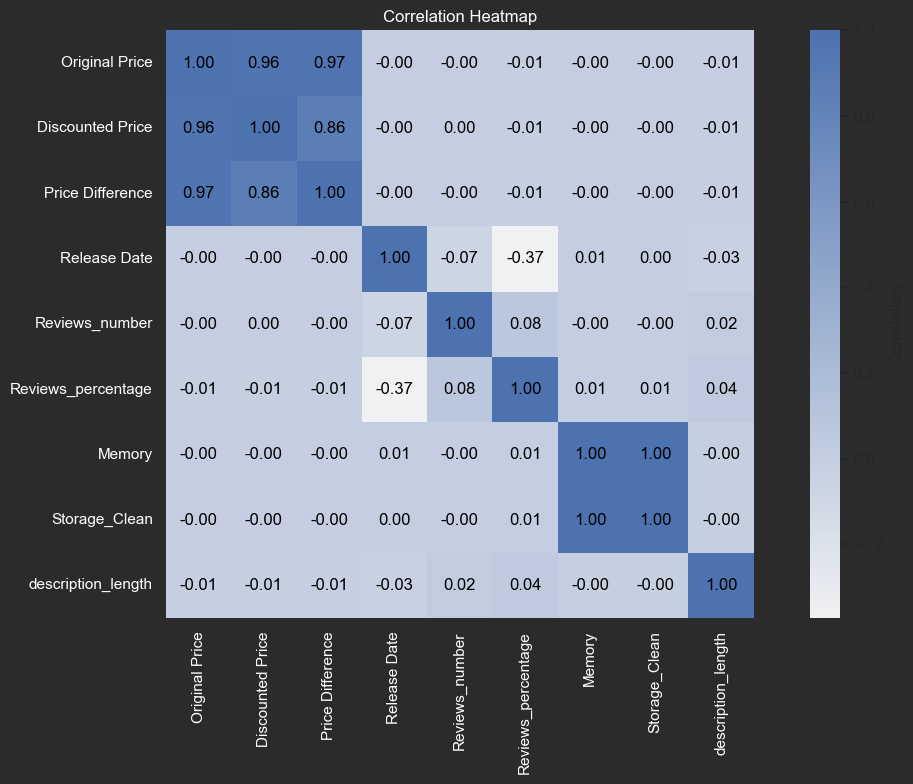

In [105]:
numerical_columns = []

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  
        numerical_columns.append(column)

plt.figure(figsize=(12, 8))

cmap = sns.color_palette("light:b", as_cmap=True)

sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", square=True, cmap=cmap, cbar_kws={"label": "Correlation"}, annot_kws={"color": "black"})

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')
plt.title('Correlation Heatmap', color='white')
plt.xlabel('', color='white')
plt.ylabel('', color='white')
plt.xticks(color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

In [106]:
#Correlation heatmap shows how all three price indicators are intercorrelated which is not suprising.

#Other features have little relationship other than Is_Upcoming and Release Date. Their positive correlation is not 
#unexpected, since the later the release date is more it is like the row to be positive in Upcoming binary value

#We can spot negative relationship bewteen Reviews_number & Reviews_percentage with respect to Release Date. 
#This might be caused by the fact that later the game has been released it has not yet gather a lot reviews or even has 
#not even received any if the row indicates upcoming game

#Percentage and number regarding the reviews have 0.29 positive correlation which is also not surprising, 
#if the game has many reviews it is more likely that a lot of people are seeing the game and if that is the case game 
#should have somewhat positive traits.

#Memory and Storage_clean have 1 correlation which is annomaly. We will check it out again when we handle Nan values in there

In [107]:
top_10_games_by_reviews = df.sort_values(by='Reviews_number', ascending=False).head(10)
top_10_games_by_reviews[['Title', 'Reviews_number']]

,Title,Reviews_number
108,Arma 3,154266.0
139,Overwatch® 2,146650.0
9,NARAKA: BLADEPOINT,146529.0
0,Baldur's Gate 3,128900.0
219,Space Engineers,78077.0
1,Counter-Strike: Global Offensive,75284.0
1014,This War of Mine,61669.0
1219,The Witcher: Enhanced Edition Director's Cut,59283.0
10,Grand Theft Auto V,22946.0
14,Dota 2,20072.0


In [108]:
# note that we are only accounting for recent reviews here since we are interested in trends. Meaning, that overall picture could vary.

In [110]:
df['Developer'] = df['Developer'].str.lower().str.strip()
df['Publisher'] = df['Publisher'].str.lower().str.strip()
df['Supported Languages'] = df['Supported Languages'].str.lower().str.strip()
df['Popular Tags'] = df['Popular Tags'].str.lower().str.strip()
df['Game Features'] = df['Game Features'].str.lower().str.strip()

In [111]:
def get_unique_from_comma_separated(column_data):
    flattened_list = [item.strip() for sublist in column_data.dropna().str.split(',').tolist() for item in sublist]
    return set(flattened_list)

columns_to_check = ['Developer', 'Publisher', 'Supported Languages', 'Popular Tags', 'Game Features']

for col in columns_to_check:
    unique_values = get_unique_from_comma_separated(df[col])
    print(f"------ {col} ------")
    print(f"Number of unique values: {len(unique_values)}")
    print("Sample values:")
    print(list(unique_values)[:10]) 
    print("\n")

------ Developer ------
Number of unique values: 47314
Sample values:
['', 'dvine game', 'sandorhq', 'killer teapot games', 'ghostdmc', 'latenightcoffee', 'sho ohhira', 'ufo crash games', 'crescent moon games', 'khaled alrasheedi']


------ Publisher ------
Number of unique values: 38158
Sample values:
['', 'dvine game', 'sandorhq', 'killer teapot games', 'titan1 studios', 'ghostdmc', 'latenightcoffee', 'ufo crash games', 'crescent moon games', 'stellar remnants']


------ Supported Languages ------
Number of unique values: 183
Sample values:
['romanian]', 'armenian', '#lang_#lang_spanish*#lang_full_audio]', 'serbian', 'danish]', 'swahili', 'hindi]', '[english', 'punjabi (gurmukhi)', 'arabic]']


------ Popular Tags ------
Number of unique values: 1303
Sample values:
['[skating', 'lore-rich]', 'looter shooter', 'tactical]', '[comic book', 'lore-rich', 'sokoban]', 'escape room', 'hentai]', 'space sim]']


------ Game Features ------
Number of unique values: 106
Sample values:
['mmo]', '

In [112]:
def convert_to_list(column_data):
    return column_data.dropna().str.split(',').apply(lambda x: [item.strip() for item in x])

columns_to_convert = ['Supported Languages', 'Popular Tags', 'Game Features']

for col in columns_to_convert:
    df[col] = convert_to_list(df[col])
df[columns_to_convert].head()

,Supported Languages,Popular Tags,Game Features
0,"[[english, french, german, spanish - spain, po...","[[rpg, choices matter, character customization...","[[single-player, online co-op, lan co-op, stea..."
1,"[[english, czech, danish, dutch, finnish, fren...","[[fps, shooter, multiplayer, competitive, acti...","[[steam achievements, full controller support,..."
2,"[[english, french, italian, german, spanish - ...","[[free to play, multiplayer, battle royale, sh...","[[online pvp, online co-op, steam achievements..."
3,"[[english, french, italian, german, spanish - ...","[[racing, open world, driving, multiplayer, au...","[[single-player, online pvp, online co-op, cro..."
4,"[[english, french, italian, german, spanish - ...","[[fps, multiplayer, shooter, action, singlepla...","[[single-player, online pvp, online co-op, cro..."


In [113]:
top_100_games = df.nlargest(100, 'Reviews_number')
top_developers = top_100_games['Developer'].unique()
top_developers_df = pd.DataFrame({'Top Developers': top_developers})
top_developers_df

,Top Developers
0,bohemia interactive
1,"blizzard entertainment, inc."
2,24 entertainment
3,larian studios
4,keen software house
...,...
86,fancy games
87,cosmic cow llc
88,blue mammoth games
89,zero point software


In [114]:
#We can see that in top 100 games 91 developers appeared. This means there are some Developer that have more than 1 games in 
#top 100 most reviewd games. Let us see which ones they are.

In [115]:
developers_counts = top_100_games['Developer'].value_counts()
developers_multiple_games = developers_counts[developers_counts > 1]
developers_multiple_games_df = pd.DataFrame({'Developer': developers_multiple_games.index, 'Number of Games': developers_multiple_games.values})
developers_multiple_games_df

,Developer,Number of Games
0,cd projekt red,4
1,valve,4
2,larian studios,2
3,keen software house,2
4,facepunch studios,2


In [116]:
top_developers_with_games = {}

for developer in developers_multiple_games.index:
    games_from_developer = top_100_games[top_100_games['Developer'] == developer]['Title'].tolist()
    top_developers_with_games[developer] = games_from_developer

top_developers_df = pd.DataFrame(list(top_developers_with_games.items()), columns=['Developer', 'Games'])
top_developers_df

,Developer,Games
0,cd projekt red,"[The Witcher: Enhanced Edition Director's Cut,..."
1,valve,"[Dota 2, Team Fortress 2, Left 4 Dead 2, Porta..."
2,larian studios,"[Baldur's Gate 3, Divinity: Original Sin (Clas..."
3,keen software house,"[Space Engineers, Medieval Engineers]"
4,facepunch studios,"[Garry's Mod, Rust]"


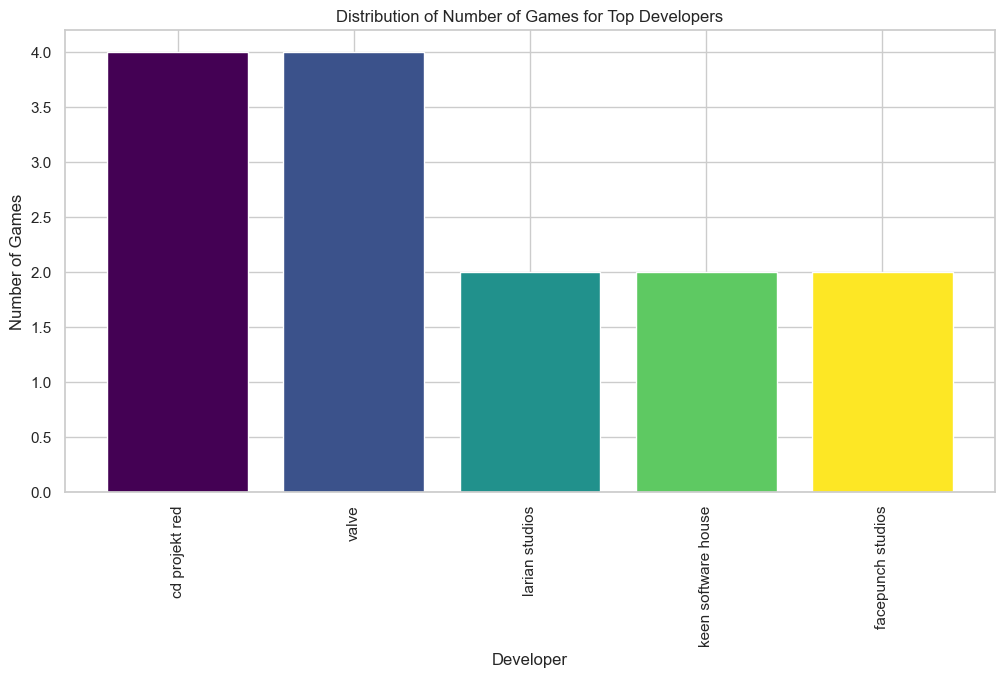

In [117]:
games_count_df = top_developers_df.copy()
games_count_df['Number of Games'] = games_count_df['Games'].apply(len)

colors = plt.cm.viridis(np.linspace(0, 1, len(games_count_df)))

plt.figure(figsize=(12, 6))
plt.bar(games_count_df['Developer'], games_count_df['Number of Games'], color=colors)
plt.title('Distribution of Number of Games for Top Developers')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

In [119]:
#These games are indeed well-known apps so it is no wonder they appeared here. Now we can obtain the same information for 
#the least appeared developers - this will not be valueable info but it is still good to know which ones were least 
#successful according to the recent reviews

bottom_100_games = df.nsmallest(100, 'Reviews_number')

least_known_developers = bottom_100_games['Developer'].unique()

developers_count = bottom_100_games['Developer'].value_counts()
developers_multiple_games = developers_count[developers_count > 1]

least_known_developers_with_games = {}

for developer in developers_multiple_games.index:
    games_from_developer = bottom_100_games[bottom_100_games['Developer'] == developer]['Title'].tolist()
    least_known_developers_with_games[developer] = games_from_developer

least_known_developers_df = pd.DataFrame(list(least_known_developers_with_games.items()), columns=['Developer', 'Games'])
least_known_developers_df

,Developer,Games
0,unknown,[METAL GEAR SOLID V: The Definitive Experience...
1,hijong park,"[Golden Hornet, Offendron Warrior, Steel Alcimus]"
2,cyan worlds inc,"[Spelunx and the Caves of Mr. Seudo, Cosmic Os..."
3,alkemi,"[An Ankou, Transcripted]"


In [120]:
#THese are just the lesast popular ones, successfullness of a game is better captured by the positive reviews percentage

top_100_games_percentage = df.nlargest(100, 'Reviews_percentage')

top_developers_percentage = top_100_games_percentage['Developer'].unique()

developers_count_percentage = top_100_games_percentage['Developer'].value_counts()
developers_multiple_games_percentage = developers_count_percentage[developers_count_percentage > 1]

top_developers_with_games_percentage = {}

for developer in developers_multiple_games_percentage.index:
    games_from_developer = top_100_games_percentage[top_100_games_percentage['Developer'] == developer]['Title'].tolist()
    top_developers_with_games_percentage[developer] = games_from_developer

top_developers_df_percentage = pd.DataFrame(list(top_developers_with_games_percentage.items()), columns=['Developer', 'Games'])
top_developers_df_percentage

,Developer,Games
0,neko works,"[NEKOPARA Vol. 4, NEKOPARA Vol. 2, NEKOPARA Ex..."
1,nihon falcom,"[The Legend of Heroes: Trails of Cold Steel, T..."
2,"kairosoft co.,ltd","[Dungeon Village 2, Game Dev Story]"
3,"jackbox games, inc.","[The Jackbox Party Pack 7, The Jackbox Party P..."
4,anchor inc.,"[Muv-Luv Alternative (マブラヴ オルタネイティヴ), Muv-Luv ..."
5,"sprite, nekonyan ltd.",[Aokana - Four Rhythms Across the Blue - EXTRA...
6,lucasarts,"[STAR WARS™ Episode I Racer, Monkey Island™ 2 ..."
7,digital eclipse,[Teenage Mutant Ninja Turtles: The Cowabunga C...
8,"koei tecmo games co., ltd.","[SAMURAI WARRIORS 5, BLUE REFLECTION]"
9,tomorrow corporation,"[Little Inferno, Human Resource Machine]"


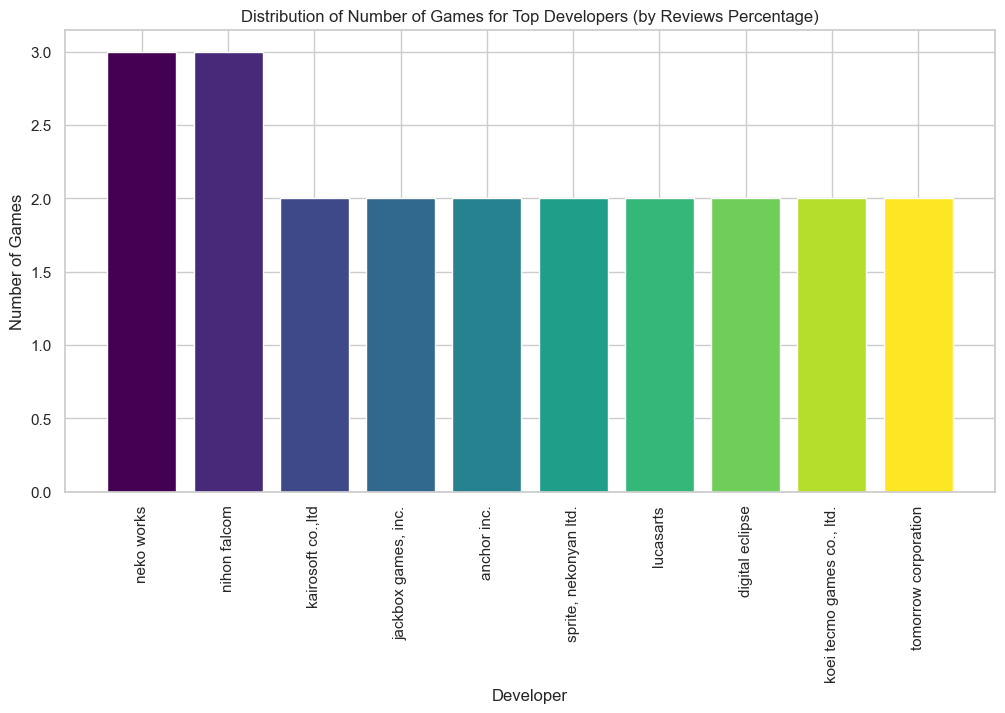

In [121]:
games_count_df_percentage = top_developers_df_percentage.copy()
games_count_df_percentage['Number of Games'] = games_count_df_percentage['Games'].apply(len)

colors_percentage = plt.cm.viridis(np.linspace(0, 1, len(games_count_df_percentage)))

plt.figure(figsize=(12, 6))
plt.bar(games_count_df_percentage['Developer'], games_count_df_percentage['Number of Games'], color=colors_percentage)
plt.title('Distribution of Number of Games for Top Developers (by Reviews Percentage)')
plt.xlabel('Developer')
plt.ylabel('Number of Games')
plt.xticks(rotation=90)
plt.show()

In [124]:
#Did these devs appear in both top 100 criterias

top_100_games_reviews = df.nlargest(100, 'Reviews_number')
top_developers_reviews = set(top_100_games_reviews['Developer'].unique())

top_100_games_percentage = df.nlargest(100, 'Reviews_percentage')
top_developers_percentage = set(top_100_games_percentage['Developer'].unique())

common_developers = top_developers_reviews.intersection(top_developers_percentage)

common_developers_df = pd.DataFrame({'Common Developers': list(common_developers)})
common_developers_df

,Common Developers


In [127]:
#There are no overlaps. This shows the idea that these features give different directions which should be well-captured

def get_top_game(df, column):
    return (df.sort_values(by=column, ascending=False)
            .groupby('Developer')
            .first()
            .reset_index()[['Developer', 'Title', column]])

top_by_number = get_top_game(df, 'Reviews_number')
top_by_percentage = get_top_game(df, 'Reviews_percentage')

merged_results = top_by_number.merge(top_by_percentage, on='Developer', suffixes=('_by_number', '_by_percentage'))
merged_results

,Developer,Title_by_number,Reviews_number,Title_by_percentage,Reviews_percentage
0,!cyberapex (skagogames),Assau!t,0.0,Assau!t,0.0
1,"""nieko""",Crystal Raiders VR,18.0,Crystal Raiders VR,72.0
2,"""revday studio""",Solo Fox,14.0,Solo Fox,92.0
3,#12,Aura Shift,0.0,Aura Shift,0.0
4,#lol entertainment,THE HUNTED,0.0,THE HUNTED,0.0
...,...,...,...,...,...
44810,（hong kong）gkd,Soul Dossier,334.0,Soul Dossier,86.0
44811,𝕲𝖗𝖆𝖓𝖉𝕸𝖎𝖓𝖎 𝕾𝖙𝖚𝖉𝖎𝖔𝖘 (ᚴᛘᛋ),Great Battles of Carolus XII,0.0,Great Battles of Carolus XII,0.0
44812,𝙅𝘼𝙄𝙇,FLAT FORM FIGHTER,0.0,FLAT FORM FIGHTER,0.0
44813,👁️,Our Elusive Suffering,72.0,Our Elusive Suffering,66.0


In [128]:
#Creating a table showing the top games for each developer based on the given column (OG Price, Discounted Price, Reviews number)

In [129]:
cols_to_average = ['Original Price', 'Discounted Price', 'Reviews_number']
average_df = df.groupby('Developer')[cols_to_average].mean()
average_df

,Original Price,Discounted Price,Reviews_number
Developer,,,
!cyberapex (skagogames),2.235,1.465,0.0
"""nieko""",8.490,8.490,18.0
"""revday studio""",2.190,2.190,14.0
#12,0.900,0.900,0.0
#lol entertainment,0.000,0.000,0.0
...,...,...,...
（hong kong）gkd,0.000,0.000,334.0
𝕲𝖗𝖆𝖓𝖉𝕸𝖎𝖓𝖎 𝕾𝖙𝖚𝖉𝖎𝖔𝖘 (ᚴᛘᛋ),3.990,3.990,0.0
𝙅𝘼𝙄𝙇,0.000,0.000,0.0


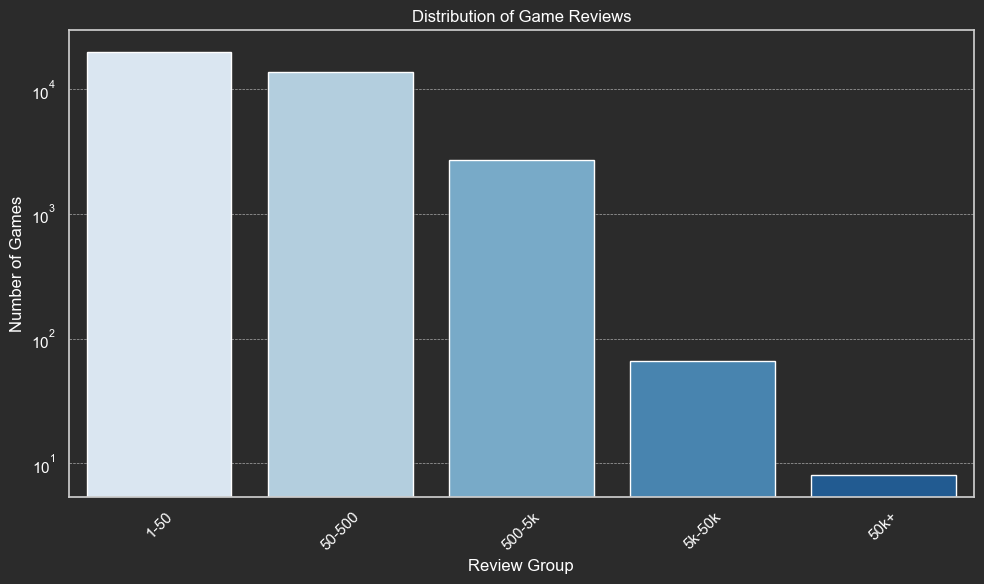

In [130]:
#Bar graph to  show how many games are in the different ranges of reviews

bin_edges = [0, 50, 500, 5000, 50000, float('inf')]
bin_labels = ['1-50', '50-500', '500-5k', '5k-50k', '50k+']

filtered_data = df[~df['Reviews_number'].isna()]

filtered_data['Review_Group'] = pd.cut(filtered_data['Reviews_number'], bins=bin_edges, labels=bin_labels)

review_count = filtered_data['Review_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=review_count.index, y=review_count.values, palette='Blues')

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Group', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Reviews', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.yscale('log')

plt.tight_layout()
plt.show()

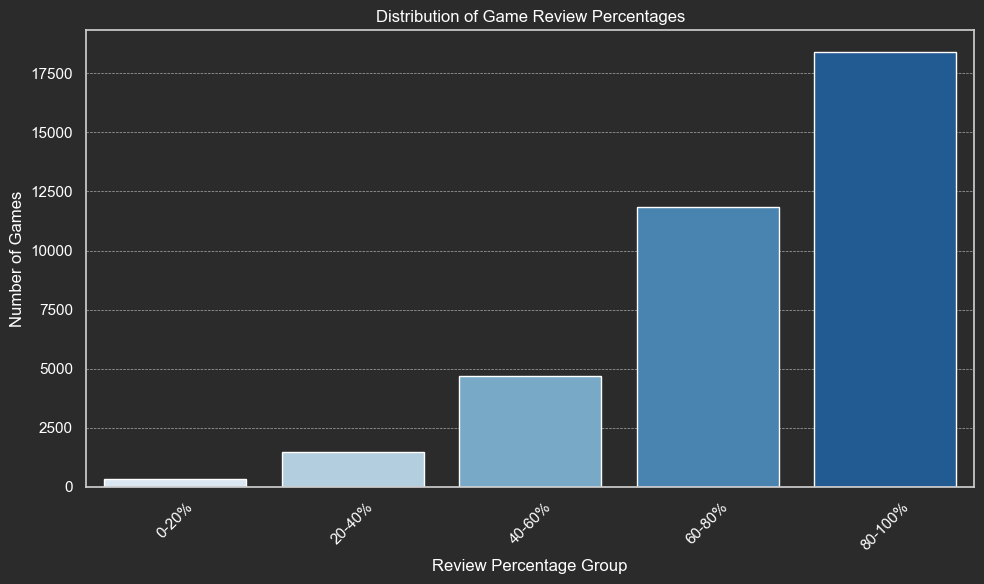

In [131]:
#Bar graph to show the number of games that fall into the different review percentages

bin_edges = [0, 20, 40, 60, 80, 100]  
bin_labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

filtered_data = df[~df['Reviews_percentage'].isna()]

filtered_data['Review_Percentage_Group'] = pd.cut(filtered_data['Reviews_percentage'], bins=bin_edges, labels=bin_labels)

review_percentage_count = filtered_data['Review_Percentage_Group'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=review_percentage_count.index, y=review_percentage_count.values, palette='Blues')

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Percentage Group', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Review Percentages', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

In [132]:
#The differences between the distribution of the number of reviews vs the review percentages is drastic. This can be due in part
#to the fact that users only borhter to give feedback to a game if they are enjoying it.

#This does not describe every case but it is factual that a majority of games that get reviewed have positive raitings

#I want to see how this breaks down between the different review summaries (e.g. "Very Positive", 'Mixed')

In [133]:
print(df['Reviews Summary'].unique())

['Overwhelmingly Positive' 'Very Positive' 'Mixed' 'Mostly Positive'
 'Unknown' 'Mostly Negative' 'Overwhelmingly Negative' 'Positive'
 'Very Negative' 'Negative']


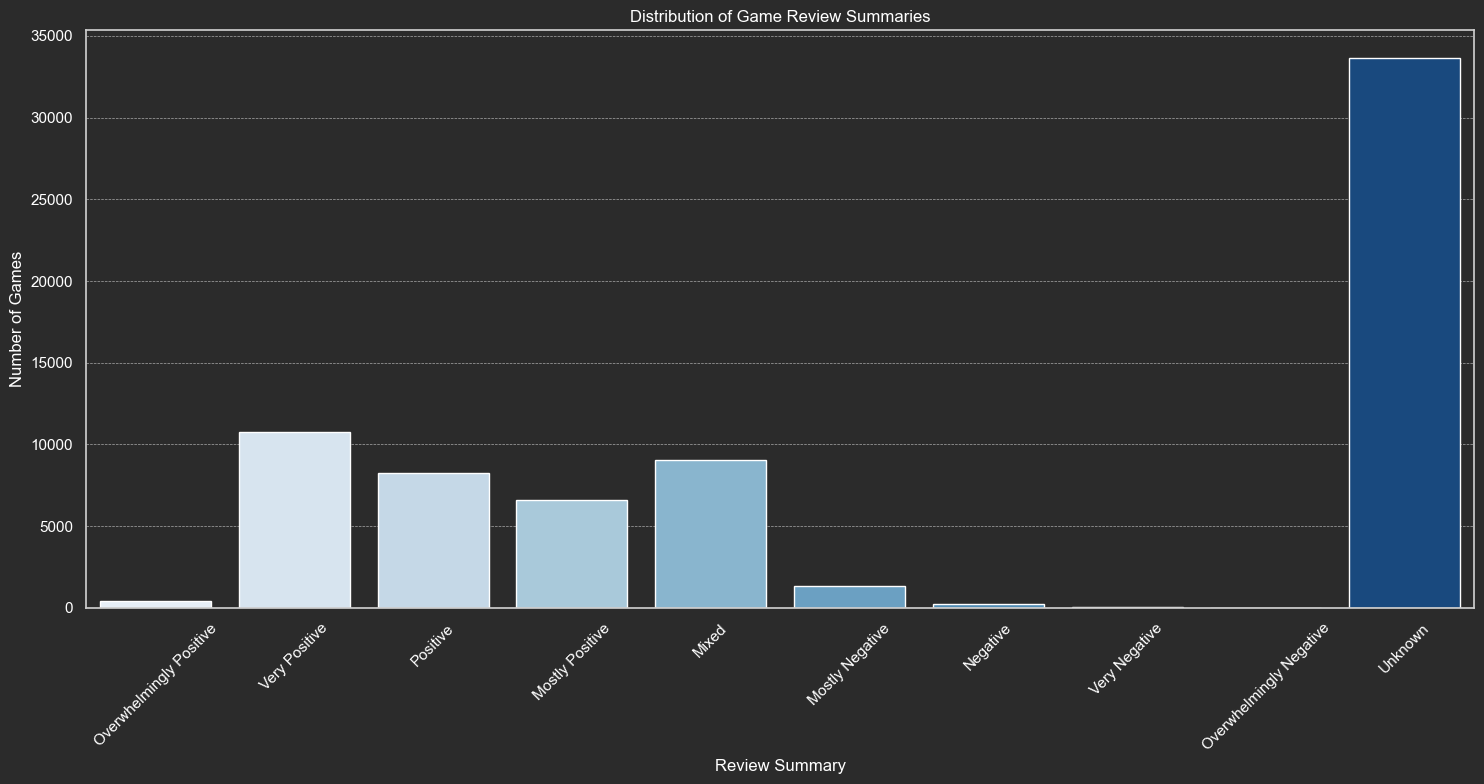

In [134]:
review_summary_count = df['Reviews Summary'].value_counts()

order = ['Overwhelmingly Positive', 'Very Positive', 'Positive', 'Mostly Positive', 'Mixed',
         'Mostly Negative', 'Negative', 'Very Negative', 'Overwhelmingly Negative', 'Unknown']

plt.figure(figsize=(15, 8))
sns.barplot(x=review_summary_count.index, y=review_summary_count.values, palette='Blues', order=order)

plt.gca().set_facecolor('#2B2B2B')
plt.gcf().set_facecolor('#2B2B2B')

plt.xlabel('Review Summary', color='white')
plt.ylabel('Number of Games', color='white')
plt.title('Distribution of Game Review Summaries', color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', color='white', linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()